In [ ]:
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# This cell downloads some support code that is used to pull together the data set.  
!git clone https://github.com/gwallison/colab-support.git &>/dev/null;
# now run the code that defines the routine
%run colab-support/get_dataframe.py

In [ ]:
# get_dataset pulls together a set of CSV files from a google storage site, then merges them
#  result: df is a dataframe with all records (though not ALL fields)
df = get_dataset()

# if you want to see what fields are in df, uncomment the following line
# df.columns

In [ ]:
# Filter to a single bgCAS type
df = df[df.bgCAS=='proprietary'].copy()

In [ ]:
# optional filter -- change year as needed
df = df[df.date.dt.year>=2014]
df = df[df.calcMass<=100]

In [ ]:
# create datenum column w/ days since first date
df['datenum'] = (df['date'] - df['date'].min()).dt.days

In [ ]:
# tell you how many NaNs in column and then drops those rows
nans = df.calcMass.isna().sum()
recs = len(df)
print(f'NAs: {nans}')
print(f'Out of {recs} records')
print(f"That means we're removing {round(nans/recs*100, 2)}% of your records")
df = df.dropna(subset=['calcMass'])

NAs: 0
Out of 162551 records
That means we're removing 0.0% of your records


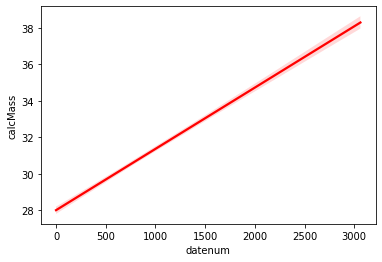

In [ ]:
# plot relationship b/t days since start and calcMass
sns.regplot(x = 'datenum', y = 'calcMass', data = df, scatter = False, 
            scatter_kws={"color": "black"}, line_kws={"color": "red"})

In [ ]:
# perform OLS regression
from statsmodels.api import OLS

X = df.datenum
y = df.calcMass

model = OLS(X, y)
results = model.fit()

In [ ]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                datenum   R-squared (uncentered):                   0.364
Model:                            OLS   Adj. R-squared (uncentered):              0.364
Method:                 Least Squares   F-statistic:                          9.297e+04
Date:                Fri, 09 Sep 2022   Prob (F-statistic):                        0.00
Time:                        19:40:37   Log-Likelihood:                     -1.3585e+06
No. Observations:              162551   AIC:                                  2.717e+06
Df Residuals:                  162550   BIC:                                  2.717e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------